# Método de Newton y métodos quasi-Newton

In [31]:
import numpy as np
b = 0.01

def objective(x):
    return 0.5 * (x[0] ** 2 + b * x[1] ** 2)

def grad_f(x):
    return np.asarray([x[0], b * x[1]])

def hessian_f(x):
    return np.array([
        [1, 0],
        [0, b]
    ])

## Método de Newton

In [32]:
def newton_optimization(objetive, initial_guess, grad, hessian, max_iter, tol=1e-6):
  solution = initial_guess
  iterations, solutions, scores = list(), list(), list()

  for i in range(max_iter):
    solution_eval = objetive(solution)
    iterations.append(i)
    solutions.append(solution)
    scores.append(solution_eval)
    print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    gradient = grad(solution)
    hess = hessian(solution)
    hess_inv = np.linalg.inv(hess)
    step = -np.dot(hess_inv, gradient)
    solution = solution + step

    if np.linalg.norm(step) < tol:
      break

  return [iterations, solutions, scores]

In [33]:
r_min, r_max = -5.0, 5.0
np.random.seed(42)
initial_guess = r_min + np.random.rand(2) * (r_max - r_min)
print("inital_guess = ", initial_guess)
max_iter = 100
iterations, solutions, scores = newton_optimization(
  objective, initial_guess, grad_f, hessian_f, max_iter
)

inital_guess =  [-1.25459881  4.50714306]
>0 f([-1.25459881  4.50714306]) = 0.88858
>1 f([0. 0.]) = 0.00000


In [34]:
from scipy.optimize import minimize

In [35]:
cost_history_BFGS = [objective(initial_guess)]

def callback_BFGS(x):
    cost_history_BFGS.append(objetive(x))

cost_history_LBFGS = [objective(initial_guess)]

def callback_LBFGS(x):
    cost_history_LBFGS.append(objective(x))

In [36]:
result_BFGS = minimize(
    objective, initial_guess, method='BFGS', callback=callback_BFGS
)

result_LBFGS = minimize(
    objective, initial_guess, method='L-BFGS-B', callback=callback_LBFGS
)

print('Estado : %s' %result_BFGS['message'])
print('Número de iteraciones : %d' %result_BFGS['nit'])
print('Número de evaluaciones de la función objetivo: %d' %result_BFGS['nfev'])
solution_BFGS = result_BFGS['x']
evaluation_BFGS = objective(solution_BFGS)
print("Solución: f(%s) = %.5f" % (solution_BFGS, evaluation_BFGS))
print()
print('Estado : %s' %result_LBFGS['message'])
print('Número de iteraciones : %d' %result_LBFGS['nit'])
print('Número de evaluaciones de la función objetivo: %d' %result_LBFGS['nfev'])
solution_LBFGS = result_LBFGS['x']
evaluation_LBFGS = objective(solution_LBFGS)
print("Solución: f(%s) = %.5f" % (solution_LBFGS, evaluation_LBFGS))

Estado : Optimization terminated successfully.
Número de iteraciones : 11
Número de evaluaciones de la función objetivo: 39
Solución: f([-2.28094076e-06 -4.22921830e-06]) = 0.00000

Estado : CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Número de iteraciones : 9
Número de evaluaciones de la función objetivo: 33
Solución: f([-7.22001098e-06 -6.28056409e-05]) = 0.00000


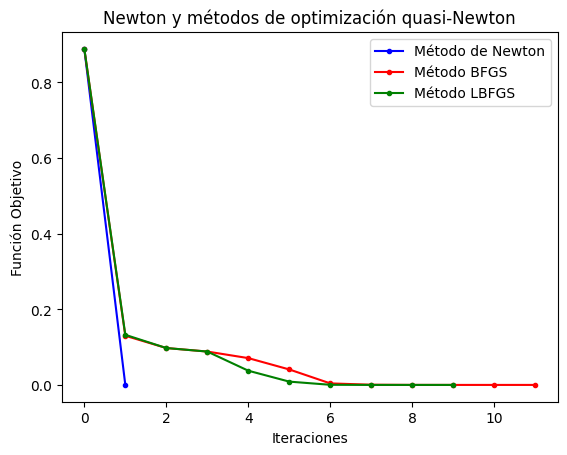

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(iterations, scores, '.-', color='blue', label='Método de Newton')
ax.plot(cost_history_BFGS, '.-', color='red', label='Método BFGS')
ax.plot(cost_history_LBFGS, '.-', color='green', label='Método LBFGS')
ax.set(xlabel='Iteraciones', ylabel='Función Objetivo', title="Newton y métodos de optimización quasi-Newton")
ax.legend()
plt.show()
